In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# creating EDA imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

<IPython.core.display.Javascript object>

In [3]:
# reading in each data file
# data was obtained from: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data

app_events = pd.read_csv("./talkingdata-mobile-user-demographics/app_events.csv.zip")
app_labels = pd.read_csv("./talkingdata-mobile-user-demographics/app_labels.csv.zip")
events = pd.read_csv("./talkingdata-mobile-user-demographics/events.csv.zip")
gender_age_train = pd.read_csv(
    "./talkingdata-mobile-user-demographics/gender_age_train.csv.zip"
)
gender_age_test = pd.read_csv(
    "./talkingdata-mobile-user-demographics/gender_age_test.csv.zip"
)
category_labels = pd.read_csv(
    "./talkingdata-mobile-user-demographics/label_categories.csv.zip"
)
phone_brand = pd.read_csv(
    "./talkingdata-mobile-user-demographics/phone_brand_device_model.csv.zip"
)

<IPython.core.display.Javascript object>

# Merging the Data

In [4]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


<IPython.core.display.Javascript object>

In [5]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


<IPython.core.display.Javascript object>

In [6]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


<IPython.core.display.Javascript object>

In [7]:
category_labels.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


<IPython.core.display.Javascript object>

In [8]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


<IPython.core.display.Javascript object>

In [9]:
# 三星 samsung
# 天语 Ktouch
# 海信 hisense
# 联想 lenovo
# 欧比 obi
# 爱派尔 ipair
# 努比亚 nubia
# 优米 youmi
# 朵唯 dowe
# 黑米 heymi
# 锤子 hammer
# 酷比魔方 koobee
# 美图 meitu
# 尼比鲁 nibilu
# 一加 oneplus
# 优购 yougo
# 诺基亚 nokia
# 糖葫芦 candy
# 中国移动 ccmc
# 语信 yuxin
# 基伍 kiwu
# 青橙 greeno
# 华硕 asus
# 夏新 panosonic
# 维图 weitu
# 艾优尼 aiyouni
# 摩托罗拉 moto
# 乡米 xiangmi
# 米奇 micky
# 大可乐 bigcola
# 沃普丰 wpf
# 神舟 hasse
# 摩乐 mole
# 飞秒 fs
# 米歌 mige
# 富可视 fks
# 德赛 desci
# 梦米 mengmi
# 乐视 lshi
# 小杨树 smallt
# 纽曼 newman
# 邦华 banghua
# E派 epai
# 易派 epai
# 普耐尔 pner
# 欧新 ouxin
# 西米 ximi
# 海尔 haier
# 波导 bodao
# 糯米 nuomi
# 唯米 weimi
# 酷珀 kupo
# 谷歌 google
# 昂达 ada
# 聆韵 lingyun
# Will use dictionary to convert to English
phone_brand.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


<IPython.core.display.Javascript object>

In [10]:
# Merging app_events and event_id through event_id column
merged_events = pd.merge(app_events, events, on="event_id")

<IPython.core.display.Javascript object>

In [11]:
# Merging app_labels and category_labels through label_id
merged_apps = pd.merge(app_labels, category_labels, on="label_id")

<IPython.core.display.Javascript object>

In [12]:
# Merging previous merged data tables together to make larger data frame
merged_events_apps = pd.merge(merged_events, merged_apps, on="app_id")

<IPython.core.display.Javascript object>

In [13]:
# Adding phone brand to merged_events_apps through device_id merge
merged_events_apps_brands = pd.merge(merged_events_apps, phone_brand, on="device_id")

<IPython.core.display.Javascript object>

In [14]:
# Creating final data frame by merging gender and age with previous dataframe
final_df = pd.merge(merged_events_apps_brands, gender_age_train, on="device_id")
final_df.head()

,event_id,app_id,is_installed,is_active,device_id,timestamp,longitude,latitude,label_id,category,phone_brand,device_model,gender,age,group
0,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,549,Property Industry 1.0,华为,Mate 7,M,19,M22-
1,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,548,Industry tag,华为,Mate 7,M,19,M22-
2,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,710,Relatives 1,华为,Mate 7,M,19,M22-
3,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,704,Property Industry 2.0,华为,Mate 7,M,19,M22-
4,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,172,IM,华为,Mate 7,M,19,M22-


<IPython.core.display.Javascript object>

# Converting Phone Brands to English

In [15]:
to_english = {
    "华为": "huawei",  # manually translated and entered
    "小米": "xiaomi",  # manually translated and entered
    "魅族": "meizu",  # manually translated and entered
    "vivo": "vivo",  # manually translated and entered
    "酷派": "coolpad",  # manually translated and entered
    "索尼": "sony",  # manually translated and entered
    "OPPO": "oppo",  # manually translated and entered
    "LG": "lg",  # manually translated and entered
    "HTC": "htc",  # manually translated and entered
    "金立": "gionee",  # manually translated and entered
    "中兴": "zte",  # manually translated and entered
    "奇酷": "qiku",  # manually translated and entered
    "TCL": "tcl",  # manually translated and entered
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
}

<IPython.core.display.Javascript object>

In [16]:
# Created new column for phone brand, can now drop old phone_brand column
final_df["english_phone_brand"] = final_df["phone_brand"].map(to_english)
final_df = final_df.drop(columns=["phone_brand"])

<IPython.core.display.Javascript object>

# Examining the Features

In [17]:
# Checking for missing values
# For the english_phone_brand column it appears less than 1% of data is missing, so drop the missing data
final_df.isna().mean()

event_id               0.000000
app_id                 0.000000
is_installed           0.000000
is_active              0.000000
device_id              0.000000
timestamp              0.000000
longitude              0.000000
latitude               0.000000
label_id               0.000000
category               0.000000
device_model           0.000000
gender                 0.000000
age                    0.000000
group                  0.000000
english_phone_brand    0.004668
dtype: float64

<IPython.core.display.Javascript object>

In [18]:
final_df = final_df.dropna()

<IPython.core.display.Javascript object>

In [19]:
# Checking the shape of the dataframe
# A little under 80 million rows, this could lead to longer execution time
# Will consider using Dask
final_df.shape

(78692532, 15)

<IPython.core.display.Javascript object>

In [20]:
# Checking data types of each column
# timestamp is an object type,
# convert timestamp to datetime type
final_df.dtypes

event_id                 int64
app_id                   int64
is_installed             int64
is_active                int64
device_id                int64
timestamp               object
longitude              float64
latitude               float64
label_id                 int64
category                object
device_model            object
gender                  object
age                      int64
group                   object
english_phone_brand     object
dtype: object

<IPython.core.display.Javascript object>

In [21]:
final_df["timestamp"] = pd.to_datetime(final_df["timestamp"])

<IPython.core.display.Javascript object>

# Checking for Sufficient Amount of Values

In [22]:
# pd.set_option("display.max_rows", None)

<IPython.core.display.Javascript object>

In [23]:
# Only want to keep event_id with enough data,
# Drop event_id rows with < 100 values
final_df["event_id"].value_counts()

1989418    2016
2640055    2010
28574      2010
2770935    2010
3226038    2010
           ... 
1397936       1
230396        1
1995050       1
2385435       1
2123453       1
Name: event_id, Length: 553973, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
count = final_df["event_id"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["event_id"].isin(keep)]

<IPython.core.display.Javascript object>

In [25]:
# Only want to keep app_id values with enough data,
# Drop app_id rows with < 1000 values
final_df["app_id"].value_counts()

 4348659952760821294    2523396
 33792862810792679      1297380
 8693964245073640147    1162820
-653184325026622087     1111032
-5839858269967688123    1090494
                         ...   
 9213694769987089976          1
 5477809057864468890          1
-8885691848766129496          1
 1554564834206590239          1
 1902571708093629424          1
Name: app_id, Length: 13160, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
count = final_df["app_id"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["app_id"].isin(keep)]

<IPython.core.display.Javascript object>

In [27]:
# Since this column only has one unique value, it does not seem important to keep for analysis,
# Will drop this column.
final_df["is_installed"].value_counts()

1    64371319
Name: is_installed, dtype: int64

<IPython.core.display.Javascript object>

In [28]:
# Appears to be enough information for each value
# Will leave this column alone.
final_df["is_active"].value_counts()

0    49284911
1    15086408
Name: is_active, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
# Only want to keep device_id values with enough data,
# Drop device_id rows with < 1000 values
final_df["device_id"].value_counts()

 4452542815713609230    336859
-4814793614000680392    295933
-1936834210441403933    273501
 9125896648976328820    271069
-4100678410207151647    261929
                         ...  
-2936496053482520449        78
-9049955329329147264        78
-7943190083782480878        71
 38630124769588888          70
 641278996203935230         46
Name: device_id, Length: 19256, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
count = final_df["device_id"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["device_id"].isin(keep)]

<IPython.core.display.Javascript object>

In [31]:
# Only want to keep timestamp values with enough data,
# Drop timestamp rows with < 100 values
final_df["timestamp"].value_counts()

2016-05-02 00:46:51    4140
2016-05-06 18:10:33    3552
2016-05-05 09:59:12    3088
2016-05-01 22:21:47    2894
2016-05-03 19:24:36    2840
                       ... 
2016-05-02 07:34:50      46
2016-05-02 08:15:43      46
2016-05-02 08:45:45      46
2016-05-02 12:38:49      46
2016-05-02 10:01:43      46
Name: timestamp, Length: 177701, dtype: int64

<IPython.core.display.Javascript object>

In [32]:
count = final_df["timestamp"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["timestamp"].isin(keep)]

<IPython.core.display.Javascript object>

In [33]:
# Only want to keep longitude values with enough data,
# Drop longitude rows with < 10000 values
final_df["longitude"].value_counts()

0.00      34338630
1.00        713188
120.99      302996
104.00      264351
113.68      219004
            ...   
0.07           109
98.26          108
103.30         102
103.20          92
110.46          91
Name: longitude, Length: 2253, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
count = final_df["longitude"].value_counts()
keep = count[count >= 10000].index
final_df = final_df[final_df["longitude"].isin(keep)]

<IPython.core.display.Javascript object>

In [35]:
# Only want to keep latitude values with enough data,
# Drop latitude rows with < 10000 values
final_df["latitude"].value_counts()

0.00     34338630
1.00       713188
30.00      315518
31.38      301191
22.93      211932
           ...   
21.67         102
26.63         102
28.05         101
36.00         101
25.89         100
Name: latitude, Length: 1673, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
count = final_df["latitude"].value_counts()
keep = count[count >= 10000].index
final_df = final_df[final_df["latitude"].isin(keep)]

<IPython.core.display.Javascript object>

In [37]:
# Only want to keep label_id values with enough data,
# Drop label_id rows with < 1000 values
final_df["label_id"].value_counts()

548    5608716
704    3898092
549    3108964
405    2214024
713    2031490
        ...   
84         149
839        116
734        106
931        104
772         63
Name: label_id, Length: 402, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
count = final_df["label_id"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["label_id"].isin(keep)]

<IPython.core.display.Javascript object>

In [39]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["category"].value_counts()

Industry tag             5608716
Property Industry 2.0    3898092
unknown                  3137741
Property Industry 1.0    3108964
Custom label             2214024
                          ...   
lose weight                 1072
Low Cost Airlines           1068
war chess                   1067
MMO                         1052
round                       1020
Name: category, Length: 305, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
# Only want to keep device_model values with enough data,
# Drop device_model rows with < 1000 values
final_df["device_model"].value_counts()

荣耀6                 3773523
Mate 7              2658842
MI 4                2505255
荣耀6 Plus            2263884
Galaxy Note 3       1819742
                     ...   
天鉴W900S                 215
Galaxy Core Lite        205
One A9                  170
1100                    170
5891Q                   128
Name: device_model, Length: 519, dtype: int64

<IPython.core.display.Javascript object>

In [41]:
count = final_df["device_model"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["device_model"].isin(keep)]

<IPython.core.display.Javascript object>

In [42]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["gender"].value_counts()

M    39845077
F    12417126
Name: gender, dtype: int64

<IPython.core.display.Javascript object>

In [43]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["age"].value_counts()

29    3766510
28    2854136
34    2810260
30    2634393
32    2390787
       ...   
76       2256
82       1703
11       1430
81       1290
78       1142
Name: age, Length: 71, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["group"].value_counts()

M32-38    10927180
M39+      10480787
M29-31     6925990
M23-26     5207226
M27-28     3923560
F33-42     3634860
F43+       2680901
M22-       2380334
F29-32     2209444
F24-26     1543534
F27-28     1277892
F23-       1070495
Name: group, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["english_phone_brand"].value_counts()

huawei     17595859
xiaomi      9068258
samsung     6589050
meizu       4595012
oppo        3839911
coolpad     2401883
vivo        2355591
lshi        1171297
lenovo      1036183
htc          429602
nubia        417315
zte          413940
gionee       397889
oneplus      293915
hammer       280011
sony         265080
qiku         231966
lg           168175
ccmc         152769
asus         108435
tcl           83624
aiyouni       80024
moto          71355
hisense       50826
yuxin         48028
nibilu        36181
meitu         18561
newman        18409
bigcola        6850
Ktouch         6406
google         6071
hasse          5873
yougo          4117
ximi           4004
dowe           3649
weimi          2295
nokia          1403
weitu          1274
lingyun        1112
Name: english_phone_brand, dtype: int64

<IPython.core.display.Javascript object>

# Removing Unnecessary Columns

In [46]:
final_df.head()

,event_id,app_id,is_installed,is_active,device_id,timestamp,longitude,latitude,label_id,category,device_model,gender,age,group,english_phone_brand
0,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,549,Property Industry 1.0,Mate 7,M,19,M22-,huawei
1,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,548,Industry tag,Mate 7,M,19,M22-,huawei
2,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,710,Relatives 1,Mate 7,M,19,M22-,huawei
3,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,704,Property Industry 2.0,Mate 7,M,19,M22-,huawei
4,6,5927333115845830913,1,1,1476664663289716375,2016-05-01 00:27:21,0.0,0.0,172,IM,Mate 7,M,19,M22-,huawei


<IPython.core.display.Javascript object>

In [47]:
# Since is_installed only have one unique value this column will be dropped.
# Getting rid of category column and using label_id to identify category
final_df = final_df.drop(
    columns=["is_installed", "timestamp", "latitude", "longitude", "category"]
)
final_df.head()

,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand
0,6,5927333115845830913,1,1476664663289716375,549,Mate 7,M,19,M22-,huawei
1,6,5927333115845830913,1,1476664663289716375,548,Mate 7,M,19,M22-,huawei
2,6,5927333115845830913,1,1476664663289716375,710,Mate 7,M,19,M22-,huawei
3,6,5927333115845830913,1,1476664663289716375,704,Mate 7,M,19,M22-,huawei
4,6,5927333115845830913,1,1476664663289716375,172,Mate 7,M,19,M22-,huawei


<IPython.core.display.Javascript object>

In [48]:
# Gets rid of duplicate rows and adds count as size
final_df = final_df.groupby(final_df.columns.tolist(), as_index=False).size()
final_df.head()

,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand,size
0,6,-8764672938472212518,1,1476664663289716375,179,Mate 7,M,19,M22-,huawei,1
1,6,-8764672938472212518,1,1476664663289716375,548,Mate 7,M,19,M22-,huawei,1
2,6,-8764672938472212518,1,1476664663289716375,704,Mate 7,M,19,M22-,huawei,1
3,6,-8764672938472212518,1,1476664663289716375,714,Mate 7,M,19,M22-,huawei,1
4,6,-8271866350659046570,0,1476664663289716375,405,Mate 7,M,19,M22-,huawei,1


<IPython.core.display.Javascript object>

In [49]:
# Creating unique column for device and app ids
final_df["download_id"] = final_df["app_id"] + final_df["device_id"]

<IPython.core.display.Javascript object>

In [50]:
final_df.head()

,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand,size,download_id
0,6,-8764672938472212518,1,1476664663289716375,179,Mate 7,M,19,M22-,huawei,1,-7288008275182496143
1,6,-8764672938472212518,1,1476664663289716375,548,Mate 7,M,19,M22-,huawei,1,-7288008275182496143
2,6,-8764672938472212518,1,1476664663289716375,704,Mate 7,M,19,M22-,huawei,1,-7288008275182496143
3,6,-8764672938472212518,1,1476664663289716375,714,Mate 7,M,19,M22-,huawei,1,-7288008275182496143
4,6,-8271866350659046570,0,1476664663289716375,405,Mate 7,M,19,M22-,huawei,1,-6795201687369330195


<IPython.core.display.Javascript object>

In [51]:
# Creating new dataframe grouping download ids to create list of label ids
label_ids = (
    final_df.groupby(["download_id"])
    .agg(lambda x: tuple(x))
    .applymap(list)
    .reset_index()[["label_id", "download_id"]]
)
label_ids.head()

,label_id,download_id
0,"[1007, 1007, 1007, 1007, 1007, 1007, 1007]",-9223276892638539712
1,"[548, 704, 713, 548, 704, 713]",-9223272092386098237
2,"[302, 303, 302, 303, 302, 303, 302, 303, 302, ...",-9223267350362224650
3,"[251, 254, 405, 548, 562, 564, 691, 704, 713, ...",-9223257467215032936
4,"[548, 704, 713, 548, 704, 713, 548, 704, 713, ...",-9223177142067208743


<IPython.core.display.Javascript object>

In [52]:
len(label_ids)

487887

<IPython.core.display.Javascript object>

In [53]:
# Adding the download_id column to original dataframe
final_df = final_df.merge(label_ids, how="left", on="download_id")

<IPython.core.display.Javascript object>

In [54]:
final_df.head()

,event_id,app_id,is_active,device_id,label_id_x,device_model,gender,age,group,english_phone_brand,size,download_id,label_id_y
0,6,-8764672938472212518,1,1476664663289716375,179,Mate 7,M,19,M22-,huawei,1,-7288008275182496143,"[179, 548, 704, 714, 179, 548, 704, 714, 179, ..."
1,6,-8764672938472212518,1,1476664663289716375,548,Mate 7,M,19,M22-,huawei,1,-7288008275182496143,"[179, 548, 704, 714, 179, 548, 704, 714, 179, ..."
2,6,-8764672938472212518,1,1476664663289716375,704,Mate 7,M,19,M22-,huawei,1,-7288008275182496143,"[179, 548, 704, 714, 179, 548, 704, 714, 179, ..."
3,6,-8764672938472212518,1,1476664663289716375,714,Mate 7,M,19,M22-,huawei,1,-7288008275182496143,"[179, 548, 704, 714, 179, 548, 704, 714, 179, ..."
4,6,-8271866350659046570,0,1476664663289716375,405,Mate 7,M,19,M22-,huawei,1,-6795201687369330195,"[405, 730, 737, 738, 774, 775, 780, 781, 785, ..."


<IPython.core.display.Javascript object>

In [55]:
final_df.shape

(51813662, 13)

<IPython.core.display.Javascript object>

In [56]:
# Dropping duplicate rows
final_df = final_df.drop_duplicates(["download_id"], keep="first")

<IPython.core.display.Javascript object>

In [57]:
# Need to reduce to around 2 million rows
final_df.shape

(487887, 13)

<IPython.core.display.Javascript object>

In [58]:
final_df.isna().mean()

event_id               0.0
app_id                 0.0
is_active              0.0
device_id              0.0
label_id_x             0.0
device_model           0.0
gender                 0.0
age                    0.0
group                  0.0
english_phone_brand    0.0
size                   0.0
download_id            0.0
label_id_y             0.0
dtype: float64

<IPython.core.display.Javascript object>

In [59]:
final_df.head(10)

,event_id,app_id,is_active,device_id,label_id_x,device_model,gender,age,group,english_phone_brand,size,download_id,label_id_y
0,6,-8764672938472212518,1,1476664663289716375,179,Mate 7,M,19,M22-,huawei,1,-7288008275182496143,"[179, 548, 704, 714, 179, 548, 704, 714, 179, ..."
4,6,-8271866350659046570,0,1476664663289716375,405,Mate 7,M,19,M22-,huawei,1,-6795201687369330195,"[405, 730, 737, 738, 774, 775, 780, 781, 785, ..."
15,6,-7509752927626140732,0,1476664663289716375,405,Mate 7,M,19,M22-,huawei,1,-6033088264336424357,"[405, 548, 730, 756, 761, 777, 782, 787, 959, ..."
26,6,-7377004479023402858,1,1476664663289716375,183,Mate 7,M,19,M22-,huawei,1,-5900339815733686483,"[183, 302, 303, 548, 549, 704, 721, 183, 302, ..."
33,6,-5839858269967688123,0,1476664663289716375,251,Mate 7,M,19,M22-,huawei,1,-4363193606677971748,"[251, 254, 405, 548, 562, 564, 691, 704, 713, ..."
51,6,-5305696816021977482,0,1476664663289716375,178,Mate 7,M,19,M22-,huawei,1,-3829032152732261107,"[178, 548, 704, 714, 723, 178, 548, 704, 714, ..."
56,6,-4514556887128287722,0,1476664663289716375,209,Mate 7,M,19,M22-,huawei,1,-3037892223838571347,"[209, 548, 704, 706, 209, 548, 704, 706, 209, ..."
60,6,-4361453417043092299,1,1476664663289716375,163,Mate 7,M,19,M22-,huawei,1,-2884788753753375924,"[163, 405, 548, 549, 704, 705, 706, 709, 713, ..."
73,6,-3955212733485100109,1,1476664663289716375,302,Mate 7,M,19,M22-,huawei,1,-2478548070195383734,"[302, 303, 302, 303, 302, 303, 302, 303, 302, ..."
75,6,-3467200097934864127,1,1476664663289716375,128,Mate 7,M,19,M22-,huawei,1,-1990535434645147752,"[128, 1014, 128, 1014, 128, 1014, 128, 1014, 1..."


<IPython.core.display.Javascript object>

In [60]:
# Only used the download_id column to create multiple labels in one column, so no longer need that column
# Also do not need the label_id_x column since label_id_y contains all the labels
final_df = final_df.drop(columns=["label_id_x", "download_id"])
final_df.head()

,event_id,app_id,is_active,device_id,device_model,gender,age,group,english_phone_brand,size,label_id_y
0,6,-8764672938472212518,1,1476664663289716375,Mate 7,M,19,M22-,huawei,1,"[179, 548, 704, 714, 179, 548, 704, 714, 179, ..."
4,6,-8271866350659046570,0,1476664663289716375,Mate 7,M,19,M22-,huawei,1,"[405, 730, 737, 738, 774, 775, 780, 781, 785, ..."
15,6,-7509752927626140732,0,1476664663289716375,Mate 7,M,19,M22-,huawei,1,"[405, 548, 730, 756, 761, 777, 782, 787, 959, ..."
26,6,-7377004479023402858,1,1476664663289716375,Mate 7,M,19,M22-,huawei,1,"[183, 302, 303, 548, 549, 704, 721, 183, 302, ..."
33,6,-5839858269967688123,0,1476664663289716375,Mate 7,M,19,M22-,huawei,1,"[251, 254, 405, 548, 562, 564, 691, 704, 713, ..."


<IPython.core.display.Javascript object>

In [61]:
final_df.shape

(487887, 11)

<IPython.core.display.Javascript object>

# Checking Value Counts for New DataFrame

In [62]:
# pd.set_option("display.max_rows", None)

<IPython.core.display.Javascript object>

In [63]:
final_df["event_id"].value_counts()

1268100    203
19935      189
28574      185
19886      185
79909      179
          ... 
2239002      1
1214990      1
371178       1
1333716      1
1066999      1
Name: event_id, Length: 34818, dtype: int64

<IPython.core.display.Javascript object>

In [64]:
# Only keep data that contains at least 10 counts,
count = final_df["event_id"].value_counts()
keep = count[count >= 10].index
final_df = final_df[final_df["event_id"].isin(keep)]

<IPython.core.display.Javascript object>

In [65]:
final_df["device_model"].value_counts()

MI 4             22175
Mate 7           17725
荣耀6              17333
荣耀6 Plus         14000
Galaxy Note 3    12254
                 ...  
醉享                  14
G3818               13
idol3               13
A355e               13
S7I                 10
Name: device_model, Length: 500, dtype: int64

<IPython.core.display.Javascript object>

In [66]:
# Only keep data that contains at least 100 counts,
count = final_df["device_model"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["device_model"].isin(keep)]

<IPython.core.display.Javascript object>

In [67]:
final_df["english_phone_brand"].value_counts()

huawei     114217
xiaomi     103067
samsung     58988
meizu       40183
oppo        36848
vivo        19107
coolpad     17843
lshi        13803
lenovo       6146
nubia        4082
hammer       3392
gionee       2775
qiku         2481
oneplus      2181
htc          1947
sony         1649
zte          1563
lg           1079
ccmc         1031
asus          661
aiyouni       599
moto          596
tcl           576
yuxin         305
meitu         264
nibilu        257
newman        255
google        131
Name: english_phone_brand, dtype: int64

<IPython.core.display.Javascript object>

In [68]:
# Only keep data that contains at least 100 counts,
count = final_df["english_phone_brand"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["english_phone_brand"].isin(keep)]

<IPython.core.display.Javascript object>

In [69]:
final_df["size"].value_counts()

1    427366
2      8624
4        36
Name: size, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
# Only keep data that contains at least 100 counts,
count = final_df["size"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["size"].isin(keep)]

<IPython.core.display.Javascript object>

In [71]:
final_df.shape

(435990, 11)

<IPython.core.display.Javascript object>

In [72]:
final_df["device_id"].value_counts()

 5163358485108251402    203
-3590835713200004419    189
-7410679970237215532    185
 7962886997244679015    185
-4580846346771082281    179
                       ... 
-8881478309599705987     12
-9053654631606385950     12
-217293774247722170      11
-2561542957420307233     11
 4382148241324428253     10
Name: device_id, Length: 9841, dtype: int64

<IPython.core.display.Javascript object>

After doing some data cleaning, the dataframe went from 78,692,532 rows by 15 columns to 435,990 rows by 11 columns. 

# Preparing Data For Analysis

## One Hot Encoding Categorical Columns

In [73]:
# Encoding the label_id_y column
mlb = MultiLabelBinarizer()
final_df = final_df.join(
    pd.DataFrame(
        mlb.fit_transform(final_df.pop("label_id_y")),
        columns=mlb.classes_,
        index=final_df.index,
    )
)

<IPython.core.display.Javascript object>

In [74]:
final_df = pd.get_dummies(
    final_df, columns=["english_phone_brand", "device_model"], drop_first=True
)
final_df.head()

,event_id,app_id,is_active,device_id,gender,age,group,size,8,9,...,device_model_魅蓝,device_model_魅蓝2,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8
0,6,-8764672938472212518,1,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,-8271866350659046570,0,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,6,-7509752927626140732,0,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,6,-7377004479023402858,1,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
33,6,-5839858269967688123,0,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## Dropping Unnecessary Columns

In [75]:
# Since I will be using group as the target variable, and group contains both age and gender, I can drop gender/age column
# Size of Duplicate rows does not seem like it is too important mainly because there were not many duplicate rows, drop size
final_df = final_df.drop(columns=["gender", "age", "size"])
final_df.head()

,event_id,app_id,is_active,device_id,group,8,9,10,11,12,...,device_model_魅蓝,device_model_魅蓝2,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8
0,6,-8764672938472212518,1,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,-8271866350659046570,0,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,6,-7509752927626140732,0,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,6,-7377004479023402858,1,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,6,-5839858269967688123,0,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [76]:
final_df.shape

(435990, 635)

<IPython.core.display.Javascript object>

In [80]:
# Converting object data to numeric data in group column
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
final_df["num_group"] = final_df["group"].map(to_num)
final_df = final_df.drop(columns=["group"])
final_df.head()

,event_id,app_id,is_active,device_id,8,9,10,11,12,13,...,device_model_魅蓝2,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8,num_group
0,6,-8764672938472212518,1,1476664663289716375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,-8271866350659046570,0,1476664663289716375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,6,-7509752927626140732,0,1476664663289716375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,6,-7377004479023402858,1,1476664663289716375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,6,-5839858269967688123,0,1476664663289716375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

# Create Visualization

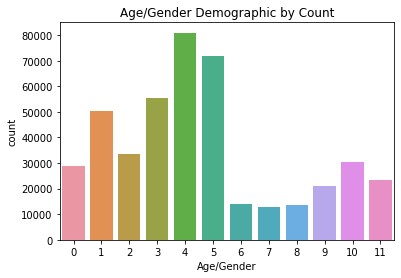

<IPython.core.display.Javascript object>

In [81]:
# Need to change font size of x and y axis
sns.countplot(final_df["num_group"])
plt.title("Age/Gender Demographic by Count")
plt.ylabel("count")
plt.xlabel("Age/Gender")
plt.show()

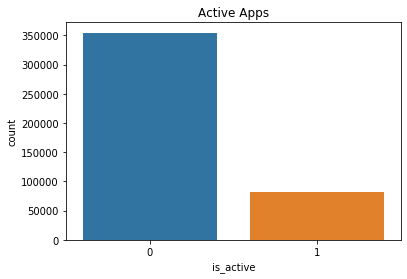

<IPython.core.display.Javascript object>

In [78]:
# It seems like most of the data is for non-active apps, however there are still a good amount of active apps.
sns.countplot(final_df["is_active"])
plt.title("Active Apps")
plt.show()

# Saving Cleaned Data as a New CSV

In [79]:
# When finished with cleaning, save it as a csv to use for future notebooks and save time
# final_df.to_csv("cleaned_data.csv", index=False)

<IPython.core.display.Javascript object>

In [80]:
# Check to see if cleaned csv is in working directory
# !dir

<IPython.core.display.Javascript object>